In [17]:
import sys
import os
import re
import json
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import textract
import spacy
import itertools as it
nlp = spacy.load('en')
import urllib3
from gensim import corpora, summarization
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
import datetime
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint
import pandas_datareader.data as web
import datetime
from elasticsearch import Elasticsearch

In [2]:
def create_dictionary(directory):
    dictionary = {}
    for file in os.listdir(directory):
        if file[0] != ".":
            key = re.findall(r'\d+', file)
            key = int("".join(key))
            dictionary[key] = textract.process(directory + "/" + file)
    return dictionary

In [3]:
buffett_dictionary = create_dictionary("/Users/ryanneal/Desktop/Warren-Buffett/data/raw")

In [18]:
json.loads(buffett_dictionary)

TypeError: the JSON object must be str, bytes or bytearray, not 'dict'

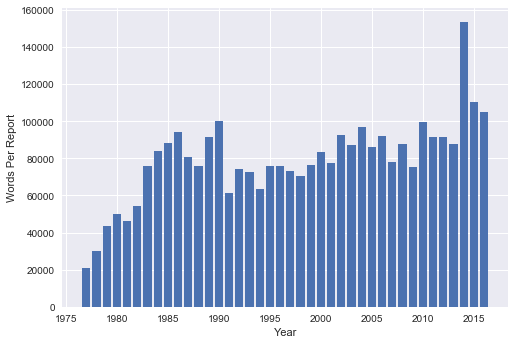

In [4]:
lengths = []
x = []
for key, value in buffett_dictionary.items():
    x.append(key)
    lengths.append(len(value))
plt.bar(x,lengths,align='center')
plt.xlabel("Year")
plt.ylabel("Words Per Report")

In [5]:
start = datetime.datetime(1977, 1, 1)
end = datetime.datetime(2017, 1, 1)
Berkshire = web.DataReader("BRK-A", 'yahoo', start, end)

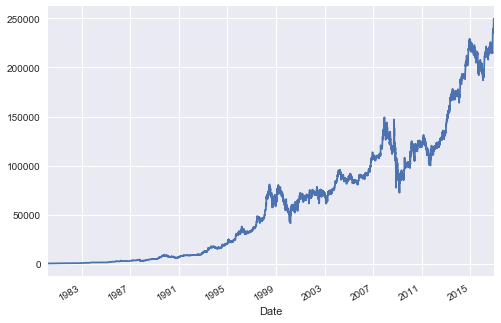

In [6]:
Berkshire['Close'].plot()

In [7]:
def build_naive_summary(text):
    from nltk.tokenize import word_tokenize
    from nltk.tokenize import sent_tokenize
    from nltk.probability import FreqDist
    from nltk.corpus import stopwords
    from collections import OrderedDict
    summary_sentences = []
    candidate_sentences = {}
    candidate_sentence_counts = {}
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    words = word_tokenize(striptext)
    lowercase_words = [word.lower() for word in words
                      if word not in stopwords.words() and word.isalpha()]
    word_frequencies = FreqDist(lowercase_words)
    most_frequent_words = FreqDist(lowercase_words).most_common(20)
    sentences = sent_tokenize(striptext)
    for sentence in sentences:
        candidate_sentences[sentence] = sentence.lower()
    for long, short in candidate_sentences.items():
        count = 0
        for freq_word, frequency_score in most_frequent_words:
            if freq_word in short:
                count += frequency_score
                candidate_sentence_counts[long] = count   
    sorted_sentences = OrderedDict(sorted(
                        candidate_sentence_counts.items(),
                        key = lambda x: x[1],
                        reverse = True)[:4])
    return sorted_sentences 

In [8]:
#berk_df = pd.DataFrame(list(buffett_dictionary.keys()), columns = ['year'])

In [9]:
#def get_length(year):
 #   return len(buffett_dictionary[year])#

In [10]:
#berk_df["length"] = berk_df["year"].apply(get_length)

In [11]:
#berk_df.head()

In [12]:
#lowercase_words = [word.lower() for word in words
   #               if word not in stopwords.words() and word.isalpha()]

In [13]:
#word_frequencies = FreqDist(lowercase_words)
#most_frequent_words = FreqDist(lowercase_words).most_common(20)
#pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(most_frequent_words)

In [14]:
#num_topics = 20 #The number of topics that should be generated
#passes = 10 

In [15]:
#lda = LdaModel(corpus,
#              id2word=dictionary,
#              num_topics=num_topics,
#              passes=10)

In [16]:
#print(lda.show_topic(4,topn=10))